In [7]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Add the parent directory to the system path
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

# Insights and Recommendations

This notebook derives insights from customer reviews, visualizes sentiment and themes, and provides actionable recommendations for fintech banking apps. The analysis uses the modular `Insights` class.

In [9]:

from scripts.db_io import DBIO
from scripts.insights import Insights


In [10]:
dbio = DBIO()
df = dbio.fetch_reviews()
dbio.close()
insights = Insights(df)

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\scripts\db_io.py:68: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, self.conn, params=params)


## Key Drivers and Pain Points

Identify the most common positive (drivers) and negative (pain points) keywords from customer reviews using sentiment analysis.

In [11]:
print("Top Drivers (Positive Keywords):\n", insights.report_drivers())
print("\nTop Pain Points (Negative Keywords):\n", insights.report_pain_points())

Top Drivers (Positive Keywords):
 app        293
good       180
best       105
banking     76
dashen      73
bank        65
super       57
easy        52
nice        52
use         51
Name: count, dtype: int64

Top Pain Points (Negative Keywords):
 app          207
bank          69
work          38
banking       38
time          35
mobile        33
use           33
need          32
developer     28
like          26
Name: count, dtype: int64


## Sentiment Distribution by Bank

Visualize the distribution of positive and negative sentiments for each bank to compare customer experiences across institutions.

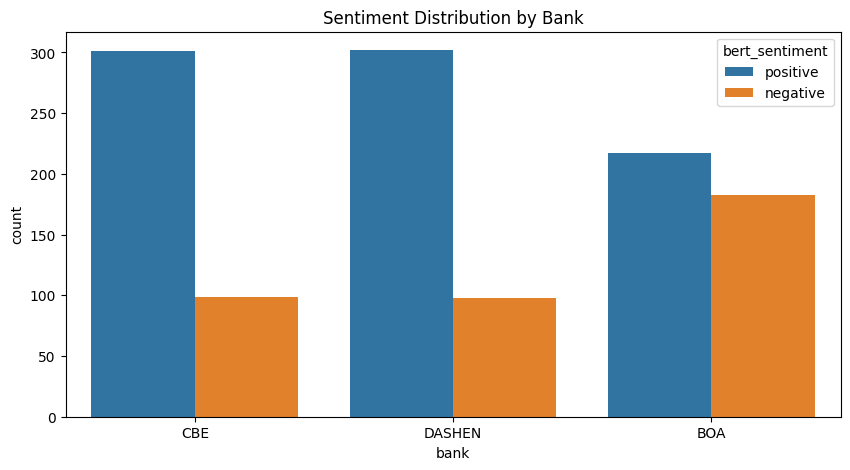

In [13]:
insights.plot_sentiment_by_bank()

## Sentiment Trend Over Time

Analyze how customer sentiment has changed over time for each bank.

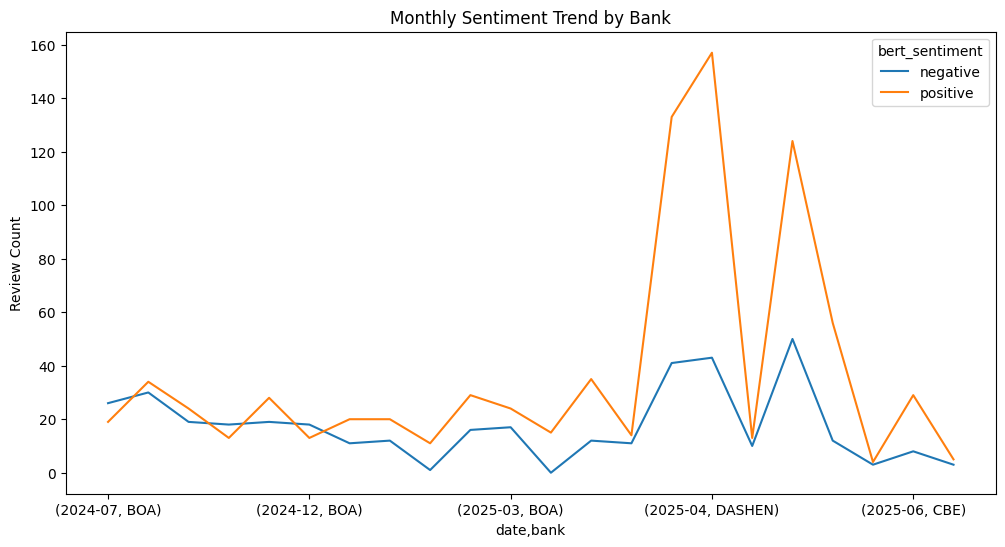

In [14]:
insights.plot_sentiment_trend()

## Keyword Cloud: Top Drivers

Visualize the most frequent positive keywords (drivers) mentioned in customer reviews.

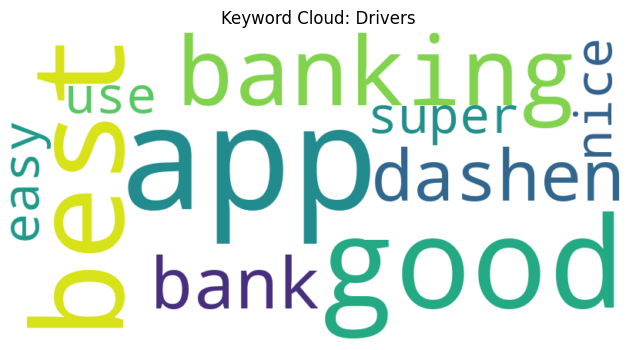

In [17]:
insights.plot_wordcloud('drivers')

## Keyword Cloud: Top Pain Points

Visualize the most frequent negative keywords (pain points) mentioned in customer reviews.

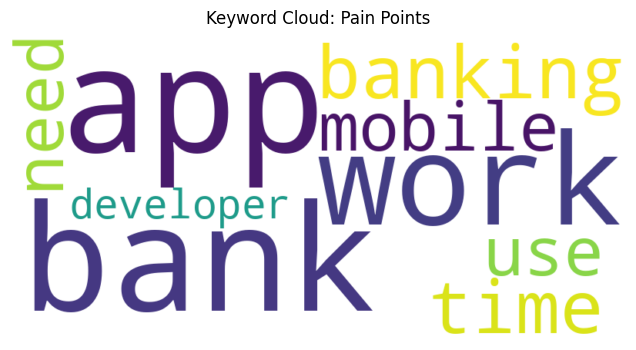

In [18]:
insights.plot_wordcloud('pain_points')

## Sentiment Comparison and Recommendations

Compare sentiment counts by bank and review actionable recommendations for app improvement.

In [19]:
print("Sentiment Comparison by Bank:\n", insights.report_bank_sentiment())
print("\nRecommended Improvements:")
for rec in insights.report_recommendations():
    print("-", rec)

Sentiment Comparison by Bank:
 bert_sentiment  negative  positive
bank                              
BOA                  183       217
CBE                   99       301
DASHEN                98       302

Recommended Improvements:
- Add a budgeting tool to help users manage finances.
- Improve app stability to reduce crashes and errors.
- Enhance navigation speed and user interface responsiveness.


## Ethics Note

Review data may be biased due to self-selection (e.g., users with negative experiences are more likely to leave reviews). Interpret results with caution.